# Seasonal Analysis of Shark Attacks 🦈

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import csv

## Data Preparation 📊

In [2]:
# Read saved data
shark_pattern_df = pd.read_csv("../RedTeam_Albert/top_shark_attacks.csv")
shark_pattern_df

,Unnamed: 0,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
0,0,2012-06-15,2012,Provoked,USA,Florida,"Summerland Key, Monroe County",Fishing,male,M,23.0,Superficial injury to calf by hooked shark PRO...,N,Nurse shark
1,1,2002-03-15,2002,Unprovoked,USA,Florida,"Deerfield Beach (near Boca Raton), Broward County",Snorkeling,Robert Land,M,39.0,Arm bitten,N,Nurse shark
2,2,2002-08-11,2002,Unprovoked,USA,Florida,"Vero Beach, Indian River County",Surfing,Brad Milliken,M,15.0,Lacerations on heel & dorsum of right foot,N,Nurse shark
3,3,2018-11-09,2018,Unprovoked,BAHAMAS,Exumas,Compass Cay,Swimming,Asher Jones,M,8.0,Arc of shallow lacerations to back,N,Nurse shark
4,4,2009-07-04,2009,Provoked,USA,Florida,"Biscayne National Park, Miami",Swimming,Carmen Dominguez,F,43.0,Thigh injured by hooked shark PROVOKED INCIDENT,N,Nurse shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,668,2015-07-03,2015,Unprovoked,AUSTRALIA,New South Wales,Lennox Head,Surfing,Michael Hoile,M,52.0,"No injury, shark bit surfboard",N,White shark
669,669,2002-09-13,2002,Unprovoked,SOUTH AFRICA,Western Cape Province,"Glencairn, False Bay",Surf skiing,Paul Mauger (or Major),M,47.0,No injury,N,White shark
670,670,1963-02-08,1963,Unprovoked,FIJI,Lomaiviti Island Group,"Taibaisa Passage, Gau Island",Spearfishing,Jone Waiteatei,M,28.0,Left arm bitten,N,White shark
671,671,1960-04-24,1960,Unprovoked,USA,California,"Tomales Point, Marin County",Free diving for abalone diving but at surface),Frank I. Gilbert,M,48.0,Foot & swim fin bitten,N,White shark


In [3]:
# Rename first column to index
shark_pattern_df = shark_pattern_df.rename(columns={
    'Unnamed: 0': 'Index'
})
shark_pattern_df

,Index,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
0,0,2012-06-15,2012,Provoked,USA,Florida,"Summerland Key, Monroe County",Fishing,male,M,23.0,Superficial injury to calf by hooked shark PRO...,N,Nurse shark
1,1,2002-03-15,2002,Unprovoked,USA,Florida,"Deerfield Beach (near Boca Raton), Broward County",Snorkeling,Robert Land,M,39.0,Arm bitten,N,Nurse shark
2,2,2002-08-11,2002,Unprovoked,USA,Florida,"Vero Beach, Indian River County",Surfing,Brad Milliken,M,15.0,Lacerations on heel & dorsum of right foot,N,Nurse shark
3,3,2018-11-09,2018,Unprovoked,BAHAMAS,Exumas,Compass Cay,Swimming,Asher Jones,M,8.0,Arc of shallow lacerations to back,N,Nurse shark
4,4,2009-07-04,2009,Provoked,USA,Florida,"Biscayne National Park, Miami",Swimming,Carmen Dominguez,F,43.0,Thigh injured by hooked shark PROVOKED INCIDENT,N,Nurse shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,668,2015-07-03,2015,Unprovoked,AUSTRALIA,New South Wales,Lennox Head,Surfing,Michael Hoile,M,52.0,"No injury, shark bit surfboard",N,White shark
669,669,2002-09-13,2002,Unprovoked,SOUTH AFRICA,Western Cape Province,"Glencairn, False Bay",Surf skiing,Paul Mauger (or Major),M,47.0,No injury,N,White shark
670,670,1963-02-08,1963,Unprovoked,FIJI,Lomaiviti Island Group,"Taibaisa Passage, Gau Island",Spearfishing,Jone Waiteatei,M,28.0,Left arm bitten,N,White shark
671,671,1960-04-24,1960,Unprovoked,USA,California,"Tomales Point, Marin County",Free diving for abalone diving but at surface),Frank I. Gilbert,M,48.0,Foot & swim fin bitten,N,White shark


In [4]:
shark_pattern_df.dtypes

Index          int64
date          object
year           int64
type          object
country       object
area          object
location      object
activity      object
name          object
sex           object
age          float64
injury        object
fatal_y_n     object
Species_1     object
dtype: object

In [5]:
# Change date column from an object to datetime
shark_pattern_df['date'] = pd.to_datetime(shark_pattern_df['date'])

In [6]:
shark_pattern_df.dtypes

Index                 int64
date         datetime64[ns]
year                  int64
type                 object
country              object
area                 object
location             object
activity             object
name                 object
sex                  object
age                 float64
injury               object
fatal_y_n            object
Species_1            object
dtype: object

## Analysis 🔍

In [7]:
shark_pattern_df['country'].value_counts()

country
USA                               327
AUSTRALIA                         139
SOUTH AFRICA                      112
BAHAMAS                            11
MEXICO                             10
NEW ZEALAND                        10
NEW CALEDONIA                       9
REUNION                             7
BRAZIL                              7
FIJI                                6
PAPUA NEW GUINEA                    4
JAMAICA                             2
CUBA                                2
ITALY                               2
CROATIA                             2
IRAQ                                2
INDONESIA                           2
GUAM                                2
PALAU                               1
GREECE                              1
OKINAWA                             1
PANAMA                              1
COSTA RICA                          1
TONGA                               1
TAIWAN                              1
HONG KONG                           1
FEDE

In [8]:
# Mapping country names to hemispheres
hemisphere_map = {
    'USA': 'Northern', 'AUSTRALIA': 'Southern', 'SOUTH AFRICA': 'Southern',
    'BAHAMAS': 'Northern', 'MEXICO': 'Northern', 'NEW ZEALAND': 'Southern',
    'NEW CALEDONIA': 'Southern', 'REUNION': 'Southern', 'BRAZIL': 'Southern',
    'FIJI': 'Southern', 'PAPUA NEW GUINEA': 'Southern', 'JAMAICA': 'Northern',
    'CUBA': 'Northern', 'ITALY': 'Northern', 'CROATIA': 'Northern',
    'IRAQ': 'Northern', 'INDONESIA': 'Southern', 'GUAM': 'Northern',
    'PALAU': 'Northern', 'GREECE': 'Northern', 'OKINAWA': 'Northern',
    'PANAMA': 'Northern', 'COSTA RICA': 'Northern', 'TONGA': 'Southern',
    'TAIWAN': 'Northern', 'HONG KONG': 'Northern', 'FEDERATED STATES OF MICRONESIA': 'Northern',
    'MALDIVES': 'Northern', 'AMERICAN SAMOA': 'Southern', 'MARSHALL ISLANDS': 'Northern',
    'SEYCHELLES': 'Southern', 'VENEZUELA': 'Northern', 'FRENCH POLYNESIA': 'Southern',
    'BRITISH WEST INDIES': 'Northern', 'MOZAMBIQUE': 'Southern'
}

# Assign seasons based on hemisphere
def get_season(month, hemisphere):
    northern_seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 
                        5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
                        9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
    southern_seasons = {1: 'Summer', 2: 'Summer', 3: 'Fall', 4: 'Fall', 
                        5: 'Fall', 6: 'Winter', 7: 'Winter', 8: 'Winter',
                        9: 'Spring', 10: 'Spring', 11: 'Spring', 12: 'Summer'}

    if hemisphere == 'Northern':
        return northern_seasons[month]
    else:
        return southern_seasons[month]

# Add a new column for hemisphere based on the country
shark_pattern_df['hemisphere'] = shark_pattern_df['country'].map(hemisphere_map)

# Determine the season
shark_pattern_df['season'] = shark_pattern_df.apply(lambda x: get_season(x['date'].month, x['hemisphere']), axis=1)

# Rearrange column order
shark_pattern_df = shark_pattern_df[['Index','date','season','year','country','hemisphere','area','location','activity','type',
                                    'name','sex','age','injury','fatal_y_n', 'Species_1']]

# Group by season
seasonal_counts = shark_pattern_df['season'].value_counts().sort_index()
print(seasonal_counts)

seasonal_attacks = shark_pattern_df.groupby(['country', 'season']).size().unstack(fill_value=0)
print(seasonal_attacks)

season
Fall      175
Spring    153
Summer    248
Winter     97
Name: count, dtype: int64
season                          Fall  Spring  Summer  Winter
country                                                     
AMERICAN SAMOA                     0       0       1       0
AUSTRALIA                         20      37      56      26
BAHAMAS                            2       1       8       0
BRAZIL                             4       0       0       3
BRITISH WEST INDIES                1       0       0       0
COSTA RICA                         0       1       0       0
CROATIA                            2       0       0       0
CUBA                               1       0       0       1
FEDERATED STATES OF MICRONESIA     0       0       1       0
FIJI                               2       2       1       1
FRENCH POLYNESIA                   1       0       0       0
GREECE                             0       0       1       0
GUAM                               0       1       0     

In [9]:
# Group by month
monthly_counts = shark_pattern_df['date'].dt.month.value_counts().sort_index()
monthly_counts

date
1     62
2     36
3     41
4     52
5     49
6     62
7     67
8     69
9     78
10    60
11    48
12    49
Name: count, dtype: int64

In [10]:
# Map month numbers to names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

In [11]:
# Replace the month index using the map
monthly_counts.index = monthly_counts.index.map(month_names)
monthly_counts

date
January      62
February     36
March        41
April        52
May          49
June         62
July         67
August       69
September    78
October      60
November     48
December     49
Name: count, dtype: int64

## Data Visualizations 📉

### 1. **Bar Graph - Shark Attacks by Month:**

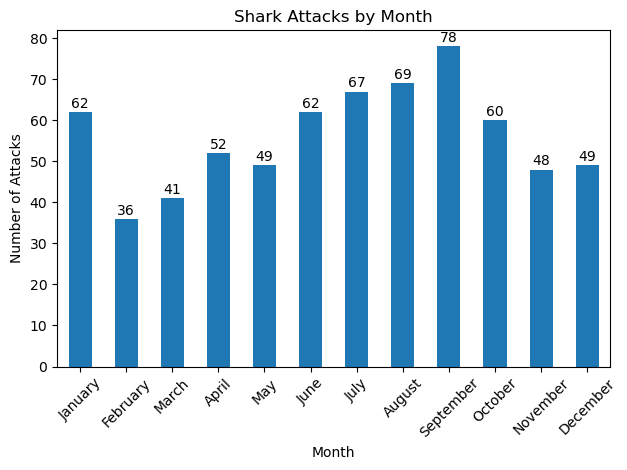

In [12]:
# Plotting monthly counts
monthly_counts.plot(kind='bar')
plt.title('Shark Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)

# Annotating the bar graph with the numerical values
for index, value in enumerate(monthly_counts):
    plt.text(index, value + 1, str(round(value, 2)), ha='center')  # Adjust the position slightly above the bar

# Use tight layout to automatically adjust subplot parameters
plt.tight_layout()

# Save png file
plt.savefig("../RedTeam_Albert/shark_attacks_by_month.png")

plt.show()

**Analysis:** The distribution of shark attacks varies significantly throughout the year. The data shows a clear increase in attacks as the year progresses, starting from January, which has a moderate count of 62 attacks. February sees a noticeable dip to 36 attacks, followed by a slight increase in March with 41 attacks. The numbers steadily rise through April and May, indicating a trend towards higher activity in late spring and early summer.

The summer months, from June to August, exhibit the highest number of attacks, peaking in August at 69 attacks. This trend continues into September, which records the highest number of attacks for the year at 78. After September, there is a decline in the frequency of attacks during the fall months, with October recording 60 attacks, and a further decrease in November and December, both under 50 attacks. This seasonal pattern suggests that shark activity might be influenced by factors such as water temperature and human activity near coasts, which are typically higher during the warmer months.

### 2. **Bar Graph - Shark Attacks by Season:**

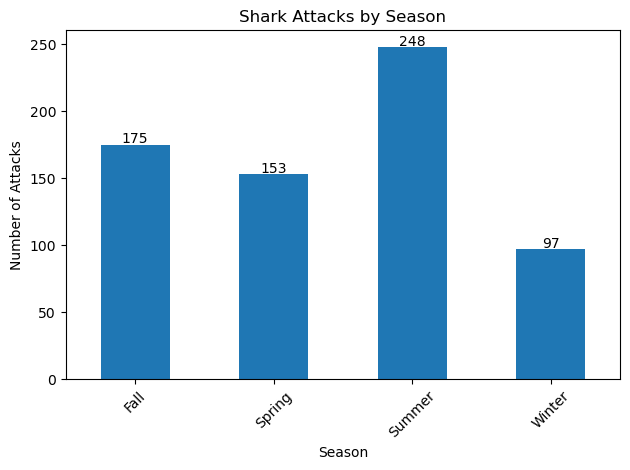

In [13]:
# Plotting seasonal counts
seasonal_counts.plot(kind='bar')
plt.title('Shark Attacks by Season')
plt.xlabel('Season')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)

# Annotating the bar graph with the numerical values
for index, value in enumerate(seasonal_counts):
    plt.text(index, value + 1, str(value), ha='center')  # Adjust the position slightly above the bar

# Use tight layout to automatically adjust subplot parameters
plt.tight_layout()

# Save png file
plt.savefig("../RedTeam_Albert/shark_attacks_by_season.png")

plt.show()

**Analysis:** Analyzing the shark attacks by season presents a clear picture of seasonal variations in attack frequency. The data indicates that summer is the most dangerous season for shark attacks, with a total of 248 incidents. This high number likely correlates with increased human activity in waters during the warmer months, as people are more likely to engage in beach and water-related activities.

Spring and fall show moderate levels of shark attacks, with 153 and 175 attacks respectively. These seasons represent transitional periods where water activities might still be popular, but not as prevalent as in the summer.

Winter has the lowest incidence of shark attacks, with only 97 reported cases. The reduced number of attacks during winter could be attributed to colder water temperatures and a significant decrease in the number of people swimming, surfing, or engaging in water sports, which are peak periods for shark-human interactions.

### 3. **Time Series Analysis and Moving Average:**

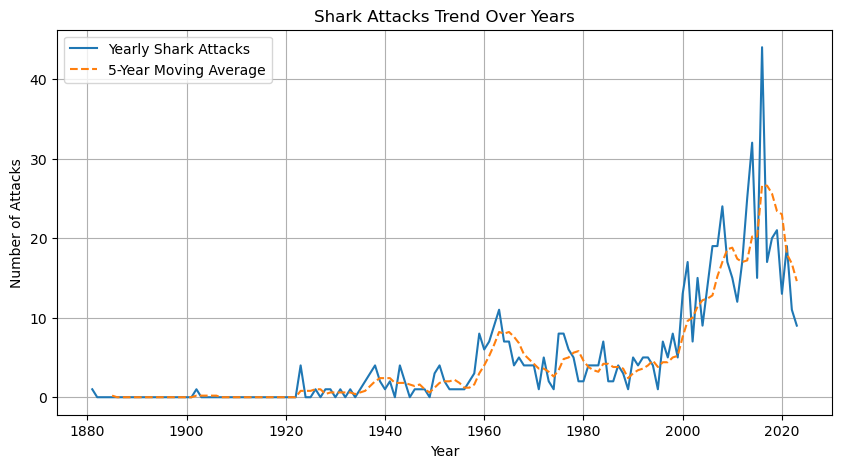

In [14]:
# Create time series analysis and plot the moving average

# Sort the DataFrame by the date
shark_pattern_df.sort_values('date', inplace=True)

# Set the date column as the DataFrame index
shark_pattern_df.set_index('date', inplace=True)

# Resample the data by year and count the number of attacks (each row being an attack)
yearly_data = shark_pattern_df.resample('Y').size()  # This will give you a Series with the count of attacks per year

# Convert the Series to DataFrame for easier handling of moving averages
yearly_data = yearly_data.to_frame(name='attacks')

# Calculate the 5-year moving average of the attacks
moving_average = yearly_data.rolling(window=5).mean()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(yearly_data.index, yearly_data['attacks'], label='Yearly Shark Attacks')
plt.plot(moving_average.index, moving_average['attacks'], label='5-Year Moving Average', linestyle='--')
plt.title('Shark Attacks Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend()
plt.grid(True)

# Save png file
plt.savefig("../RedTeam_Albert/shark_attacks_trends_over_years.png")

plt.show()

**Analysis:** Shark attacks were minimal from 1880 to 1920, likely due to less frequent human interaction with shark habitats and limited reporting capabilities, with a notable count of 4 attacks in 1922. From 1923 to 2000, there was a gradual increase in shark attacks, driven by growing coastal populations and increased participation in water-related activities. The period between 2000 and 2015 saw a significant spike in shark attacks, peaking at 44 attacks in 2015, which could be attributed to enhanced global tourism and improved data collection methods. Since 2015, there has been a marked decline in shark attacks, with the numbers dropping to approximately 9 by 2022, likely due to enhanced safety measures and shifting environmental factors. The 5-year moving average highlights a general upward trend over the century, reaching its zenith shortly after the annual peak, and effectively demonstrates the overarching trends despite annual fluctuations.

### 4. **Linear Regression:**

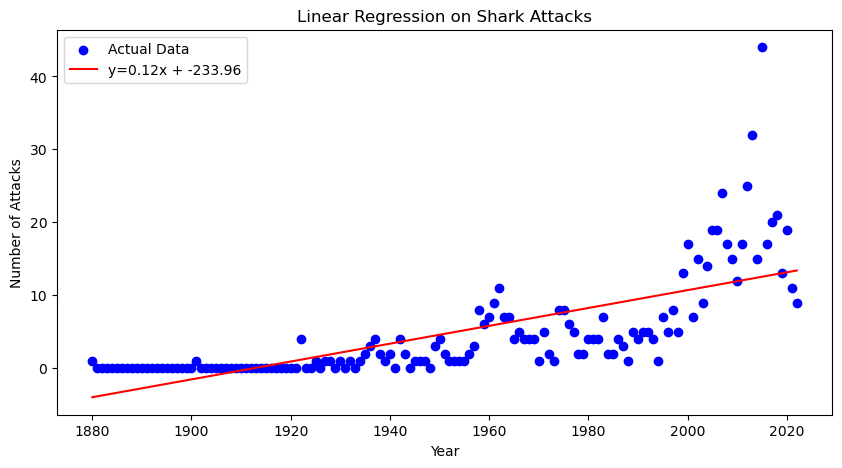

The r-value is: 0.7188099719912268


In [15]:
# Use the yearly_data variable from previous graph
# Resample the data by year and count the number of attacks
yearly_data['year'] = yearly_data.index.year

# Calculate linear regression of shark attacks
slope, intercept, r_value, p_value, std_err = linregress(yearly_data['year'], yearly_data['attacks'])

# Calculate the corresponding y-values based on the regression equation
y_regression = yearly_data['year'] * slope + intercept

# Plot the Regression Line Over Time
plt.figure(figsize=(10, 5))
plt.scatter(yearly_data['year'], yearly_data['attacks'], color='blue', label='Actual Data')
plt.plot(yearly_data['year'], y_regression, color='red', label=f'y={slope:.2f}x + {intercept:.2f}')
plt.title('Linear Regression on Shark Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend()

# Save png file
plt.savefig("../RedTeam_Albert/linear_regression_on_shark_attacks.png")

plt.show()

print(f'The r-value is: {r_value}')

**Analysis:** The linear regression model, represented by the equation `y=0.12x−233.96`, suggests a positive trend in the number of shark attacks over time, with the slope of 0.12 indicating that attacks have generally increased each year. The intercept of -233.96 can be interpreted as the model's starting point relative to the year scale used in the calculation, usually based on the date format transformed into a numerical value.

The r-value, or correlation coefficient, is approximately 0.719, which indicates a strong positive correlation between time and the number of shark attacks. This high r-value supports the model's reliability in depicting the upward trend in shark attacks. When combined with the time series graph showing the actual data points and the 5-year moving average, this linear regression model highlights the overall increase in shark attacks over the analyzed period, aligning with observed peaks and the general historical trend noted in the data.